<a href="https://colab.research.google.com/github/PrathamMalhotra21/Online_Retail_Customer_Segmentation/blob/main/Pratham_Unsupervised_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Online Retail Customer Segmentation**



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member - Pratham**

# **Project Summary -**

The project focuses on a UK-based non-store online retail business that specializes in unique all-occasion gifts. The goal is to uncover the major customer segments of the business using a transaction data set that contains information on customer transactions, such as invoice number, product code, description, quantity, invoice date, unit price, customer ID, and country. By analyzing this data, we aim to identify different customer segments based on their purchasing behavior and characteristics, such as demographics, purchasing frequency, and average spend. The insights gained from this analysis can help the business optimize its marketing and sales strategies to better serve its customers, ultimately improving customer satisfaction and increasing revenue.


# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**The objective of this project is to analyze the transaction data of a UK-based non-store online retail business that specializes in unique all-occasion gifts and identify the major customer segments based on their purchasing behavior and characteristics. The data set includes information on invoice number, product code, description, quantity, invoice date, unit price, customer ID, and country. The goal is to gain insights into the different customer segments, their behavior, and their needs, in order to optimize the business's marketing and sales strategies. This analysis can help the business better understand its customers and tailor its offerings to their preferences and needs.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [47]:
# Import Libraries
import numpy as np
from numpy import math
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
sns.set_palette("colorblind")

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Unsupervised-Project/Online Retail.xlsx - Online Retail.csv")

### Dataset First View

In [50]:
# Dataset First Look
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [51]:
# Dataset Rows & Columns count
df.shape

(541909, 8)

### Dataset Information

In [52]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Duplicate Values

In [53]:
# Dataset Duplicate Value Count
df.duplicated().sum()

5268

#### Missing Values/Null Values

In [54]:
# Missing Values/Null Values Count
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

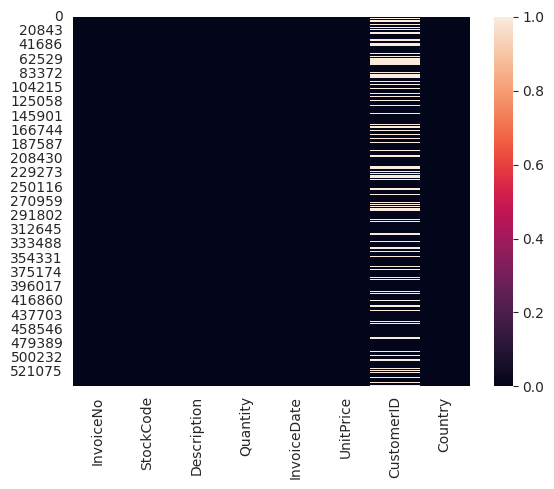

In [55]:
# Visualizing the missing values
sns.heatmap(df.isnull())
plt.show()

### What did you know about your dataset?

We have given a dataset of UK based online store our objective is to segment the customer from the given dataset.

* Shape of dataset contain 541909 obseravtion and 8 variables.
* Dataset contain 5268 duplicates.
* Also dataset contain null values in CustomerID,Description. Reason could be due to human error.

## ***2. Understanding Your Variables***

In [56]:
# Dataset Columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [57]:
# Dataset Describe
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
InvoiceNo,541909,25900,573585,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,541909,4070,85123A,2313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,541909.0,NaN,NaN,NaN,9.55225,218.081158,-80995.0,1.0,3.0,10.0,80995.0
InvoiceDate,541909,23260,10/31/11 14:41,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UnitPrice,541909.0,NaN,NaN,NaN,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,NaN,NaN,NaN,15287.69057,1713.600303,12346.0,13953.0,15152.0,16791.0,18287.0
Country,541909,38,United Kingdom,495478,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description 

* **InvoiceNo**: Invoice number. 
* **StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* **Description**: Product (item) name.
* **Quantity**: The quantities of each product (item) per transaction. Numeric.
* **InvoiceDate**: Invice Date and time. Numeric, the day and time when each transaction was generated.
* **UnitPrice**: Unit price. Numeric, Product price per unit.
* **CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* **Country**: Country name. Nominal, the name of the country where each customer resides.

### Check Unique Values for each variable.

In [58]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  InvoiceNo is 25900 .
No. of unique values in  StockCode is 4070 .
No. of unique values in  Description is 4223 .
No. of unique values in  Quantity is 722 .
No. of unique values in  InvoiceDate is 23260 .
No. of unique values in  UnitPrice is 1630 .
No. of unique values in  CustomerID is 4372 .
No. of unique values in  Country is 38 .


In [59]:
# Check Unique Values for each variable.
for i in df.columns:
  print("\n",i,"\n",df[i].unique())


 InvoiceNo 
 ['536365' '536366' '536367' ... '581585' '581586' '581587']

 StockCode 
 ['85123A' '71053' '84406B' ... '90214U' '47591b' '23843']

 Description 
 ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']

 Quantity 
 [     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    288    -12    -24
     16      9    128     25     30     28      7     56     72    200
    600    480     -6     14     -2     11     33     13     -4     -5
     -7     -3     70    252     60    216    384    -10     27     15
     22     19     17     21     34     47    108     52  -9360    -38
     75    270     42    240     90    320   1824    204     69    -36
   -192   -144    160   2880   1400     39    -48    -50     26   1440
     31     

## 3. ***Data Wrangling***

### Data Wrangling Code

In [60]:
# Drop duplicated values
df.drop_duplicates(inplace=True)

In [61]:
# Check for duplicates
df.duplicated().sum()

0

In [62]:
# Null values 
# We cant fill null values in Customer ID because it is a unique given to the customer. So it betters to  drop it.
df.isnull().sum().sort_values(ascending=False)

CustomerID     135037
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [63]:
# Drop the null values
df.dropna(subset=['CustomerID'], how='all', inplace=True)

In [64]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [65]:
# Checking The cancel order
order_can = df[df["InvoiceNo"].str.contains('C')]
order_can.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom


In [66]:
# Converting to datetime foramt
df["InvoiceDate"] = pd.to_datetime(df.InvoiceDate,format='%m/%d/%y %H:%M')

# Extracting the features like day,month,year
df['Day']=df['InvoiceDate'].dt.day_name()
df['Month']=df['InvoiceDate'].dt.month_name()
df["year"] = df["InvoiceDate"].apply(lambda x: x.year)
df["hour"] = df["InvoiceDate"].apply(lambda x: x.hour)
df["minute"] = df["InvoiceDate"].apply(lambda x: x.minute)

In [67]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Month,year,hour,minute
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,December,2010,8,26
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,2010,8,26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,December,2010,8,26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,2010,8,26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,2010,8,26


In [68]:
# Creating a new columns called Toatal Amount
df["Total_Amt"] = df["UnitPrice"]*df["Quantity"]

### What all manipulations have you done and insights you found?

* First, We drop duplicate that have in the dataset.
* Then we drop entire observation where customer Id is not given.
* Check the does we have cancel orders or not.
* Then we extract month,day,year,hours,min from the Invoice Date.
* Also create a new column which is total amount.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - Most Popular And Least Popular Product

In [69]:
# Top 10 Product
top_product = df["Description"].value_counts().reset_index().sort_values(by='Description',ascending=False)
top_product.rename(columns={'index': 'Description_Name','Description':'Count'}, inplace=True)
top_product.head()

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2058
1,REGENCY CAKESTAND 3 TIER,1894
2,JUMBO BAG RED RETROSPOT,1659
3,PARTY BUNTING,1409
4,ASSORTED COLOUR BIRD ORNAMENT,1405


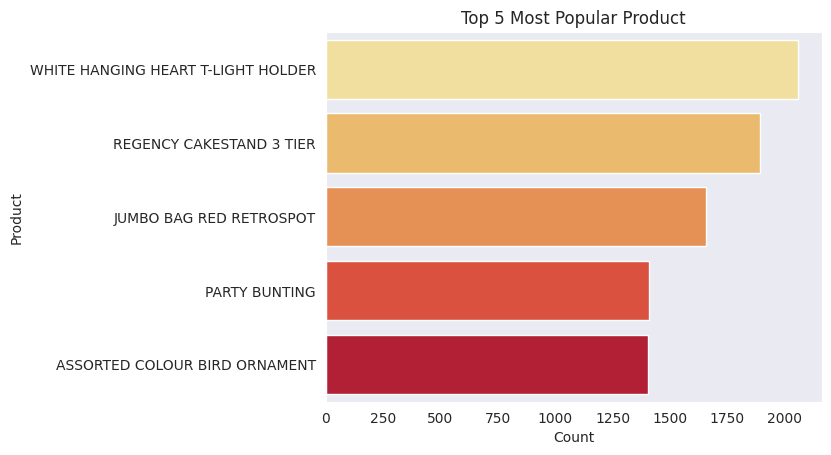

In [70]:
# Chart - 1 visualization code
ax = sns.barplot(y='Description_Name',x='Count',data=top_product.head(5),palette='YlOrRd')
plt.ylabel("Product")
plt.title("Top 5 Most Popular Product")
plt.show()

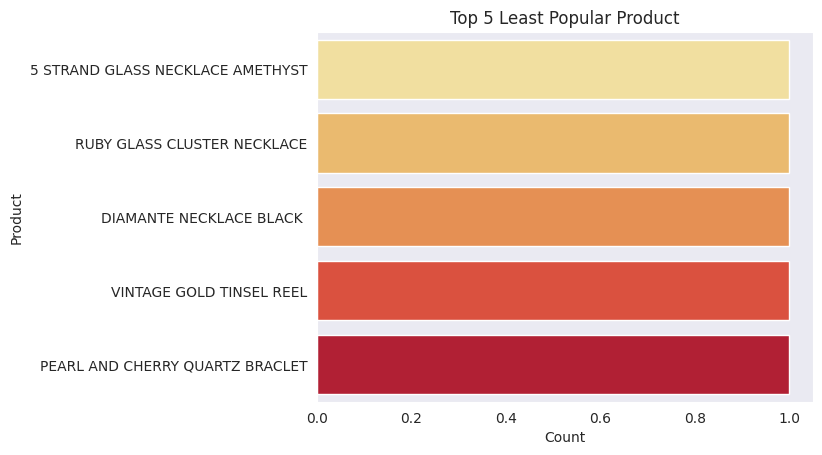

In [71]:
# Chart - 1 visualization code
sns.barplot(y='Description_Name',x='Count',data=top_product.tail(5),palette='YlOrRd')
plt.ylabel("Product")
plt.title("Top 5 Least Popular Product")
plt.show()

##### 1. Why did you pick the specific chart?

We use barplot to plot most popular and least popular product.

##### 2. What is/are the insight(s) found from the chart?

**Most Popular Product**
WHITE HANGING HEART T-LIGHT HOLDER.
1.	REGENCY CAKESTAND 3 TIER.
2. JUMBO BAG RED RETROSPOT.	
3.	PARTY BUNTING.
4.	ASSORTED COLOUR BIRD ORNAMENT.

**Least Popular Product**
1. STRAND GLASS NECKLACE AMETHYST.
2.	RUBY GLASS CLUSTER NECKLACE.
3.	DIAMANTE NECKLACE BLACK.
4.	VINTAGE GOLD TINSEL REEL.	
5.	PEARL AND CHERRY QUARTZ BRACLET.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes this well help us understand
* Demand of the product
* Popularity of the product that allows to boost our sales.
* Inventory Mangment.

#### Chart - Share Of Country

In [72]:
country_df = df['Country'].value_counts().reset_index().sort_values(by='Country',ascending=False)
country_df.rename(columns={'index':'Country','Country':'Counts'},inplace=True)
country_df['Count in %'] =  country_df['Counts']*100/df['Country'].count()
country_df.head()

,Country,Counts,Count in %
0,United Kingdom,356728,88.825809
1,Germany,9480,2.360534
2,France,8475,2.110288
3,EIRE,7475,1.861286
4,Spain,2528,0.629476


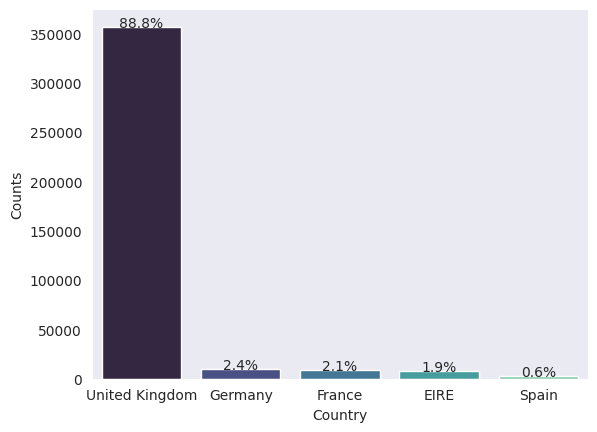

In [73]:
# Chart - 2 visualization code
sns.barplot(y="Counts",x="Country",data=country_df.head(),palette='mako')
for i in range(5):
  plt.text(x=i,y= country_df['Counts'].loc[i]+2,s=f"{country_df['Count in %'][i]:.1f}%", ha='center')
plt.show()

In [74]:
country_cost = df.groupby("Country")["Total_Amt"].sum().reset_index().sort_values(by='Total_Amt',ascending=False)
country_cost.head()

,Country,Total_Amt
35,United Kingdom,6747156.154
23,Netherlands,284661.540
10,EIRE,250001.780
14,Germany,221509.470
13,France,196626.050


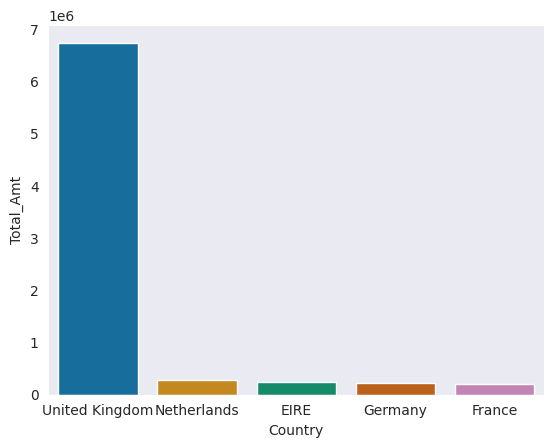

In [75]:
# Chart - 3 visualization code
sns.barplot(x="Country",y='Total_Amt',data=country_cost.head())
plt.show()

##### 1. Why did you pick the specific chart?

I am using barplot to display Top 10 Countries.

##### 2. What is/are the insight(s) found from the chart?

From the above insight. I have found that most of the business actual lies in UK due to which contribution of other country in terms of revenue generation and share is less compare to UK.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,This will help the businesses to improve their customer satisfaction and logistics processes, potentially leading to fewer cancelled orders and increased revenue.

#### Chart - Top Customer ID

In [76]:
top_customers = df['CustomerID'].value_counts().reset_index().sort_values(by='CustomerID',ascending = False)
top_customers.rename(columns = {'index':'CustomerID','CustomerID':'count'},inplace = True)
top_customers.head()

,CustomerID,count
0,17841.0,7812
1,14911.0,5898
2,14096.0,5128
3,12748.0,4459
4,14606.0,2759


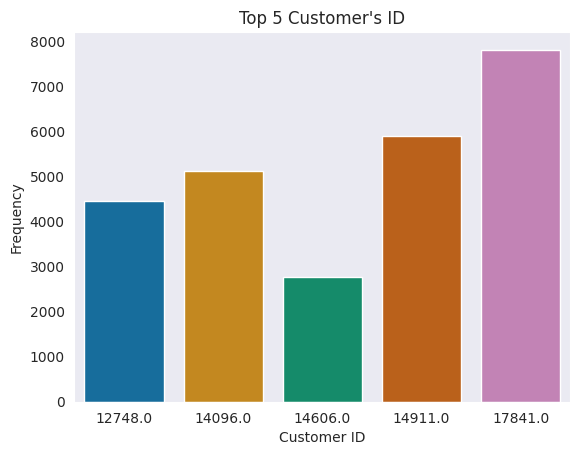

In [77]:
# Chart
sns.barplot(x = 'CustomerID',y = 'count',data = top_customers.head(5))
plt.xlabel('Customer ID')
plt.ylabel('Frequency')
plt.title("Top 5 Customer's ID")
plt.show()

##### 1. Why did you pick the specific chart?

I am using barplot to display Top Customers

#### Chart - Top Stock Code

In [78]:
stock_df = df['StockCode'].value_counts().reset_index().sort_values(by='StockCode',ascending = False)
stock_df.rename(columns = {'index':'StockCode','StockCode':'count'},inplace = True)
stock_df.head()

,StockCode,count
0,85123A,2065
1,22423,1894
2,85099B,1659
3,47566,1409
4,84879,1405


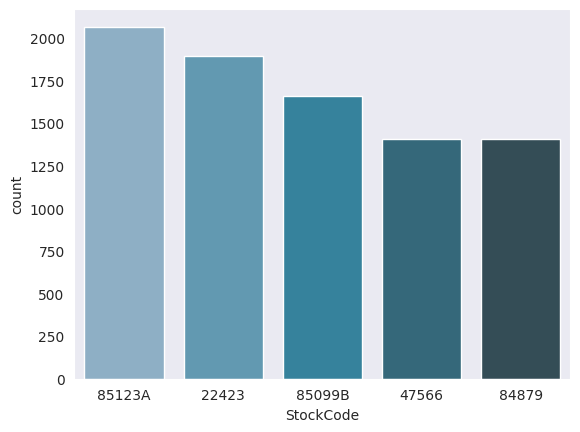

In [79]:
# Chart - 5 visualization code
sns.barplot(x = "StockCode",y="count",data=stock_df.head(),palette='PuBuGn_d')
plt.show()

##### 1. Why did you pick the specific chart?

I am barplot to display top stock code. 

#### Chart - Order Cancel

**Most Cancel Product**

In [80]:
can_product = order_can['Description'].value_counts().reset_index().sort_values(by='Description',ascending=False)
can_product.rename(columns={'index':'Description','Description':'Counts'},inplace=True)
can_product.head()

,Description,Counts
0,REGENCY CAKESTAND 3 TIER,180
1,Manual,175
2,POSTAGE,97
3,JAM MAKING SET WITH JARS,86
4,Discount,77


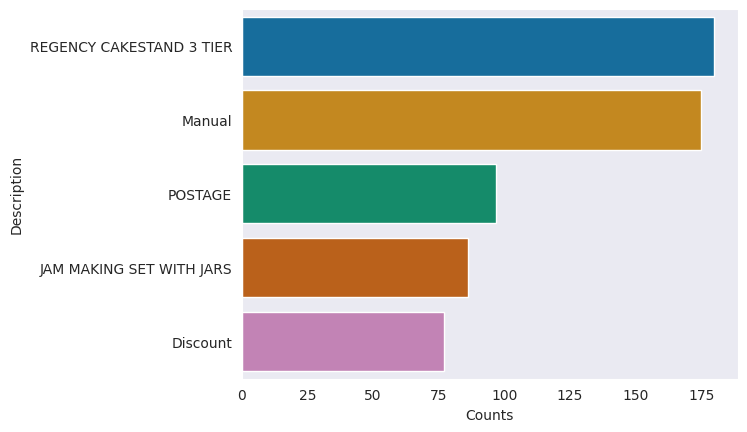

In [81]:
# Chart - 6 visualization code
sns.barplot(data=can_product.head(),y='Description',x='Counts')
plt.show()

**Most Cancel Order by Country**

In [82]:
country_can = order_can['Country'].value_counts().reset_index().sort_values(by='Country',ascending=False)
country_can.rename(columns={'index':'Country','Country':'Counts'},inplace=True)
country_can['Count in %'] =  country_can['Counts']*100/order_can['Country'].count()
country_can.head()

,Country,Counts,Count in %
0,United Kingdom,7501,84.546889
1,Germany,453,5.105951
2,EIRE,247,2.784040
3,France,148,1.668170
4,USA,112,1.262399


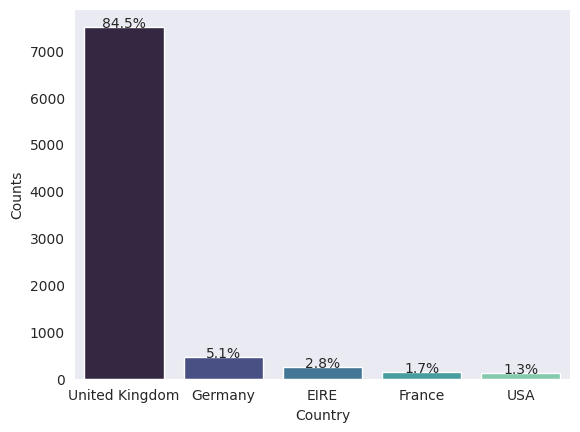

In [83]:
# Chart
sns.barplot(y="Counts",x="Country",data=country_can.head(),palette='mako')
for i in range(5):
  plt.text(x=i,y= country_can['Counts'].loc[i]+2,s=f"{country_can['Count in %'][i]:.1f}%", ha='center')
plt.show()

##### 1. Why did you pick the specific chart?

I am using barplot to get insight from cancel orders.

##### 2. What is/are the insight(s) found from the chart?

**Most Cancel Order are -**
1. REGENCY CAKESTAND 3 TIER	
2.	Manual	
3.	POSTAGE	
**Most Cancel Orders From the Country**
Again Uk has most cancel order the reason is clear that most of the business lies in the uk.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,The above insight help to know the demand of the customer so that we can improve later on.

#### Chart - Day,Month,Hours

In [84]:
day_df=df['Day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name'}, inplace=True)
day_df.rename(columns={'Day': 'Count'}, inplace=True)
day_df

,Day_Name,Count
0,Thursday,81575
1,Wednesday,69753
2,Tuesday,67376
3,Monday,65715
4,Sunday,61673
5,Friday,55512


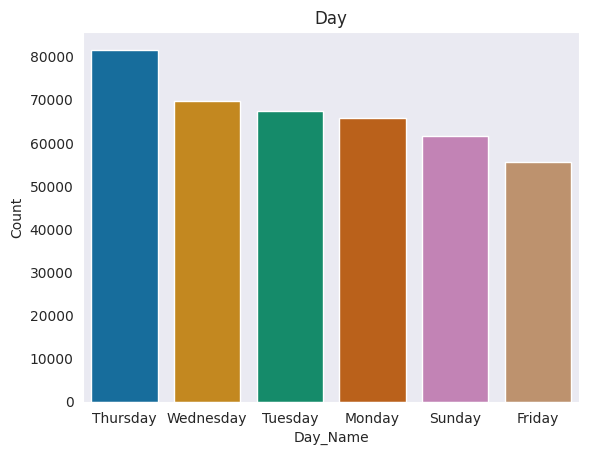

In [85]:
# Chart
plt.title('Day')
sns.barplot(x='Day_Name',y='Count',data=day_df)
plt.show()

**Month**

In [86]:
month_df=df['Month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'Month': 'Count'}, inplace=True)
month_df

,Month_Name,Count
0,November,64232
1,October,49928
2,December,43736
3,September,40459
4,May,28661
5,June,27576
6,March,27516
7,August,27444
8,July,27256
9,April,22988


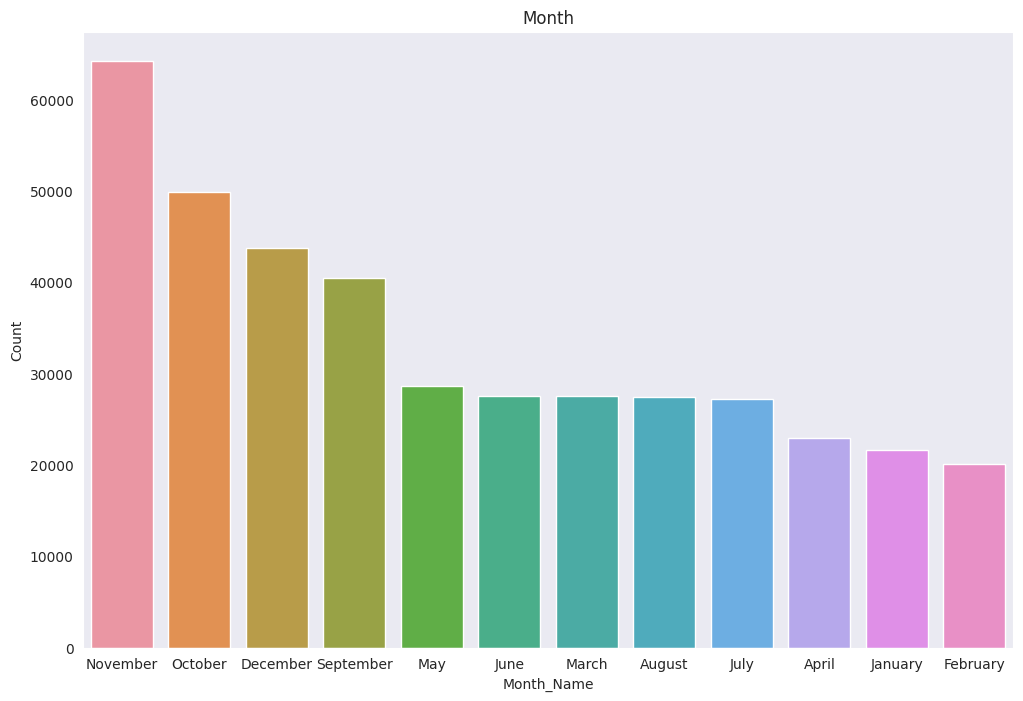

In [87]:
# Chart
plt.figure(figsize=(12,8))
plt.title('Month')
sns.barplot(x='Month_Name',y='Count',data=month_df)
plt.show()

In [88]:
hour_df=df['hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hour_Name'}, inplace=True)
hour_df.rename(columns={'hour': 'Count'}, inplace=True)
hour_df

,Hour_Name,Count
0,12,72213
1,13,64051
2,14,54194
3,11,49525
4,15,45641
5,10,38725
6,16,24618
7,9,22446
8,17,13604
9,8,8789


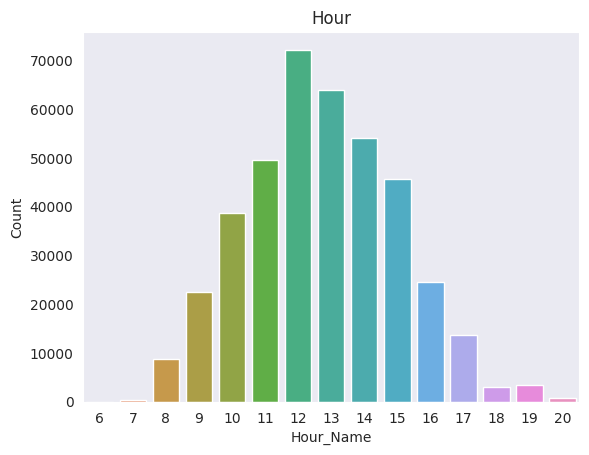

In [89]:
# Chart
plt.title('Hour')
sns.barplot(x='Hour_Name',y='Count',data=hour_df)
plt.show()

##### 1. Why did you pick the specific chart?

I use barplot to plot day,month and hours.

##### 2. What is/are the insight(s) found from the chart?

* Most of the customers have purches the items in Thursday ,Wednesday and Tuesday.
* Most numbers of customers have purches the gifts in the month of November ,October and December September
* Less numbers of customers have purches the gifts in the month of April ,january and February
* We can see that in AfterNone Time most of the customers have purches the item.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, This will help us maintaining our inventory when our most customer visit to the store. Also help us to boost our sales during these periods.

#### Chart - Correlation Heatmap

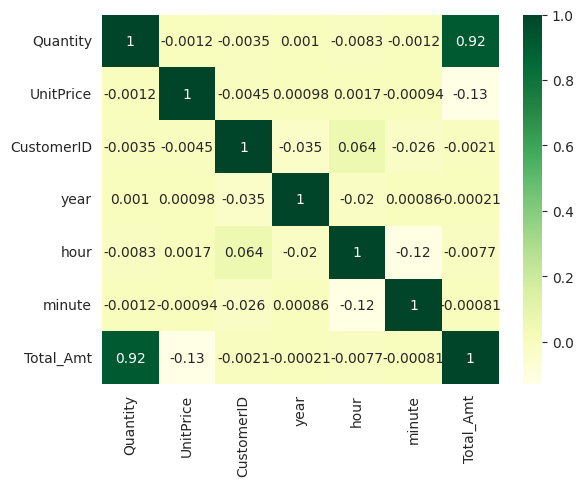

In [90]:
# Correlation Heatmap visualization code
sns.heatmap(df.corr(),annot=True,cmap='YlGn')
plt.show()

##### 1. Why did you pick the specific chart?

We plotting correaltion usinng heatmap

##### 2. What is/are the insight(s) found from the chart?

I have found that Total_Amt and Quantity has high correlation.

## ***5. Hypothesis Testing***

In [91]:
# Copy the dataset
dataset = df.copy()

### Hypothetical Statement - 1

**Do recent customers tend to spend more?**
* Null hypothesis: Recent customers do not tend to spend more than older customers.
* Alternative hypothesis: Recent customers tend to spend more than older customers.



In [95]:
import datetime as dt
now = dt.date(2011, 12, 9)
dataset['date'] = dataset['InvoiceDate'].dt.date
# Create a new column date
dataset['date'] = dataset['InvoiceDate'].dt.date
# Group the data by customer ID and find the most recent purchase date for each customer
rfm = dataset.groupby('CustomerID').agg({'date': lambda x: (now - x.max()).days, 
                                       'InvoiceNo': lambda x: len(x), 'Total_Amt': lambda x: x.sum()})
# Rename columns
rfm.rename(columns={'date': 'Recency', 'InvoiceNo': 'Frequency', 'Total_Amt': 'Monetary'}, inplace=True)
# Diving the customer into recent and old
recent = rfm[rfm['Recency'] <= 30]
older = rfm[rfm['Recency'] > 30]
# calculate mean monetary value for each Customer
mean_recent = np.mean(recent['Monetary'])
mean_older = np.mean(older['Monetary'])

# state the null hypothesis and alternative hypothesis
null_hypothesis = "Recent customers do not tend to have a higher monetary value than older customers"
alternative_hypothesis = "Recent customers tend to have a higher monetary value than older customers"

# perform two-sample t-test
from scipy.stats import ttest_ind
t, p = ttest_ind(recent['Monetary'], older['Monetary'], equal_var=True)

# determine whether to reject the null hypothesis based on the p-value
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis. " + alternative_hypothesis)
else:
    print("Fail to reject the null hypothesis. " + null_hypothesis)

Reject the null hypothesis. Recent customers tend to have a higher monetary value than older customers


In [96]:
print("P-value: ", p)

P-value:  7.062644645359355e-26


### Hypothetical Statement - 2

**Do frequent customer spend large or small amount at a time?**

* Null hypothesis: Frequent customers do not spend more than non-frequent customers.
* Alternative hypothesis: Frequent customers spend more than non-frequent customers.



In [99]:
frequent = rfm[rfm['Frequency'] > 10]
non_frequent = rfm[rfm['Frequency'] <= 10]

# calculate mean monetary value for each group
mean_frequent = np.mean(frequent['Monetary'])
mean_non_frequent = np.mean(non_frequent['Monetary'])

# state the null hypothesis and alternative hypothesis
null_hypothesis = "Frequent customers do not spend more than non-frequent customers"
alternative_hypothesis = "Frequent customers spend more than non-frequent customers"

# perform two-sample t-test
t, p = ttest_ind(frequent['Monetary'], non_frequent['Monetary'], equal_var=True)

# determine whether to reject the null hypothesis based on the p-value
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis. " + alternative_hypothesis)
else:
    print("Fail to reject the null hypothesis. " + null_hypothesis)

Reject the null hypothesis. Frequent customers spend more than non-frequent customers


In [100]:
print("P-value: ", p)

P-value:  5.100881592233078e-08


## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [101]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [102]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [103]:
# Manipulate Features to minimize feature correlation and create new features
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df=df[~df['InvoiceNo'].str.contains('C')]

In [104]:
# Get Last Date And Using as a current date
last_date = df['InvoiceDate'].max()
print(last_date)

2011-12-09 12:50:00


In [105]:
# Now Setting last date as current date
import datetime as dt
now = dt.date(2011,12,9)

# Creating a new column date
df['date'] = pd.DatetimeIndex(df.InvoiceDate).date

In [106]:
# Gropd by Customer ID and Invoice date
recency_df = df.groupby(by='CustomerID', as_index=False)['date'].max()
recency_df.rename(columns={'date':'Last_Purchase_Date'},inplace=True)

# Calculate Recency - how often Customer is purchasing with reference to latest date in days.
recency_df['Recency'] = recency_df.Last_Purchase_Date.apply(lambda x: (now-x).days)
recency_df.drop('Last_Purchase_Date',axis=1,inplace=True)
recency_df.head()

,CustomerID,Recency
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310


In [107]:
# Group the data by customer ID and find the most recent purchase date for each customer
frequency_df  = df.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_df .rename(columns={'InvoiceNo':'Frequency'},inplace=True)
frequency_df .head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [108]:
# Calculate Monetary - How much money a customer spends on
monetary_df = df.groupby(by='CustomerID', as_index=False)['Total_Amt'].sum()
monetary_df.rename(columns={'Total_Amt': 'Monetary'},inplace=True)
monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [109]:
# Combine Recency and Frequency..
rf = recency_df.merge(frequency_df,left_on='CustomerID',right_on='CustomerID')
#combibe rf and Monetary values..
rfm_df = rf.merge(monetary_df,left_on='CustomerID',right_on='CustomerID')
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [110]:
rfm_df[['Recency','Frequency','Monetary']].describe()

,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000
mean,92.041484,90.512100,2048.215924
std,100.007757,225.515328,8984.248352
min,0.000000,1.000000,0.000000
25%,17.000000,17.000000,306.455000
50%,50.000000,41.000000,668.560000
75%,141.500000,98.000000,1660.315000
max,373.000000,7676.000000,280206.020000


In [111]:
# Split into four segments using quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'CustomerID': {0.25: 13812.5, 0.5: 15299.0, 0.75: 16778.5},
 'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.5},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 98.0},
 'Monetary': {0.25: 306.455, 0.5: 668.5600000000001, 0.75: 1660.315}}

In [112]:
# Giving the score to Recency,Frequency,Monetary
rfm_df['R'] = pd.qcut(rfm_df['Recency'], q=[0, 0.25, 0.5, 0.75, 1], labels=list(range(4, 0, -1)))
rfm_df['F'] = pd.qcut(rfm_df['Frequency'], q=[0, 0.25, 0.5, 0.75, 1], labels=list(range(1, 5)))
rfm_df['M'] = pd.qcut(rfm_df['Monetary'], q=[0, 0.25, 0.5, 0.75, 1], labels=list(range(1, 5)))
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12346.0,325,1,77183.60,1,1,4
1,12347.0,2,182,4310.00,4,4,4
2,12348.0,75,31,1797.24,2,2,4
3,12349.0,18,73,1757.55,3,3,4
4,12350.0,310,17,334.40,1,1,2


In [113]:
# rfm Score
rfm_df['RFMScore'] = rfm_df['R'].astype(str) + rfm_df['F'].astype(str) + rfm_df['M'].astype(str)
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMScore
0,12346.0,325,1,77183.60,1,1,4,114
1,12347.0,2,182,4310.00,4,4,4,444
2,12348.0,75,31,1797.24,2,2,4,224
3,12349.0,18,73,1757.55,3,3,4,334
4,12350.0,310,17,334.40,1,1,2,112


In [114]:
# Segment the Customer On basis on rfm
print("Best Customers: ",len(rfm_df[rfm_df['RFMScore']=='444']))
print("Loyal Customers: ",len(rfm_df[rfm_df['RFMScore']=='444']))
print("Big Spenders: ",len(rfm_df[rfm_df['M']==4]))
print("Potential Customer: ",len(rfm_df[rfm_df['RFMScore']=='334']))

Best Customers:  443
Loyal Customers:  443
Big Spenders:  1085
Potential Customer:  59


In [115]:
# Drop the R,F,M 
rfm_df.drop(['R','F','M','RFMScore'],inplace=True,axis=1)
rfm_df.set_index("CustomerID", inplace=True)
rfm_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40


#### 2. Feature Selection

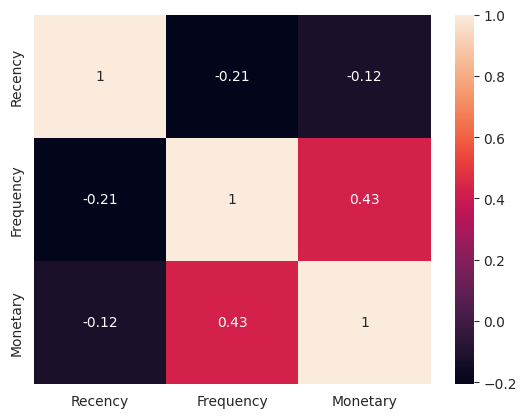

In [116]:
# Select your features wisely to avoid overfitting
sns.heatmap(rfm_df.corr(),annot=True)
plt.show()

##### What all feature selection methods have you used  and why?

Answer Here.

### 5. Data Transformation

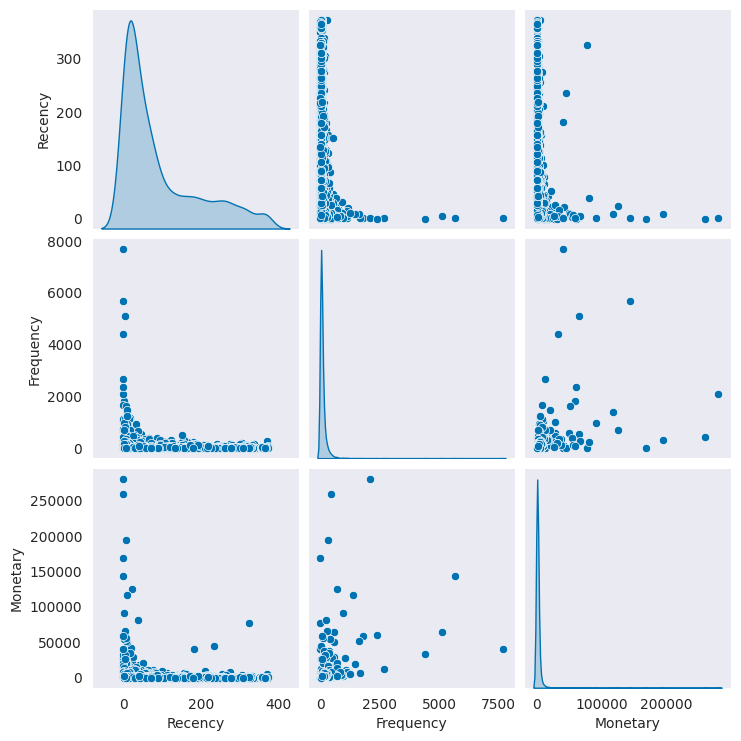

In [117]:
# Transform Your data
sns.pairplot(rfm_df, diag_kind='kde')
plt.show()

In [118]:
# Logrithum Transformation
rfm_df['Recency_log'] = rfm_df['Recency'].apply(lambda x : math.log(x+0.1))
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(lambda x : math.log(x+0.1))
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(lambda x : math.log(x+0.1))

### 6. Data Scaling

In [119]:
# Scaling your data
features = ['Recency_log', 'Frequency_log', 'Monetary_log']
scaler = StandardScaler()
X = scaler.fit_transform(rfm_df[features].values)

##### Which method have you used to scale you data and why?

## ***7. ML Model Implementation***

### ML Model - KMean

**K-Means with silhouette_score**

Silhouette score for 2 clusters: 0.396
Silhouette score for 3 clusters: 0.308
Silhouette score for 4 clusters: 0.299
Silhouette score for 5 clusters: 0.276
Silhouette score for 6 clusters: 0.277
Silhouette score for 7 clusters: 0.268
Silhouette score for 8 clusters: 0.263
Silhouette score for 9 clusters: 0.250
Silhouette score for 10 clusters: 0.256
Silhouette score for 11 clusters: 0.267
Silhouette score for 12 clusters: 0.258
Silhouette score for 13 clusters: 0.256
Silhouette score for 14 clusters: 0.262
Silhouette score for 15 clusters: 0.260


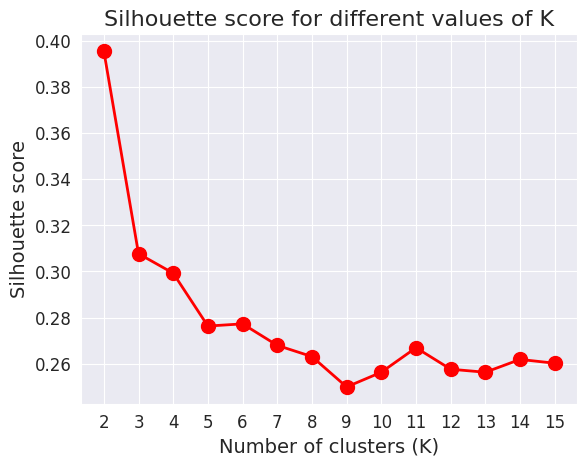

In [120]:
# ML Model - 1 Implementation
silhouette_scores = []

# Loop over different values of K
for n_clusters in range(2, 16):
    # Initialize the KMeans model with the number of clusters
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++')
    
    # Fit the KMeans model to the data
    kmeans.fit(X)
    
    # Predict the cluster labels for each data point
    labels = kmeans.labels_
    
    # Calculate the silhouette score for this solution
    silhouette = silhouette_score(X, labels)
    
    # Append the silhouette score to the array
    silhouette_scores.append(silhouette)
    
    # Print the silhouette score for this solution
    print(f"Silhouette score for {n_clusters} clusters: {silhouette:.3f}")
    
# Plot the silhouette scores
plt.plot(range(2, 16), silhouette_scores, '-o', color='red', markersize=10, linewidth=2)
plt.xlabel('Number of clusters (K)', fontsize=14)
plt.ylabel('Silhouette score', fontsize=14)
plt.title('Silhouette score for different values of K', fontsize=16)
plt.xticks(range(2, 16), fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

In [121]:
# KMeans object with 2 clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

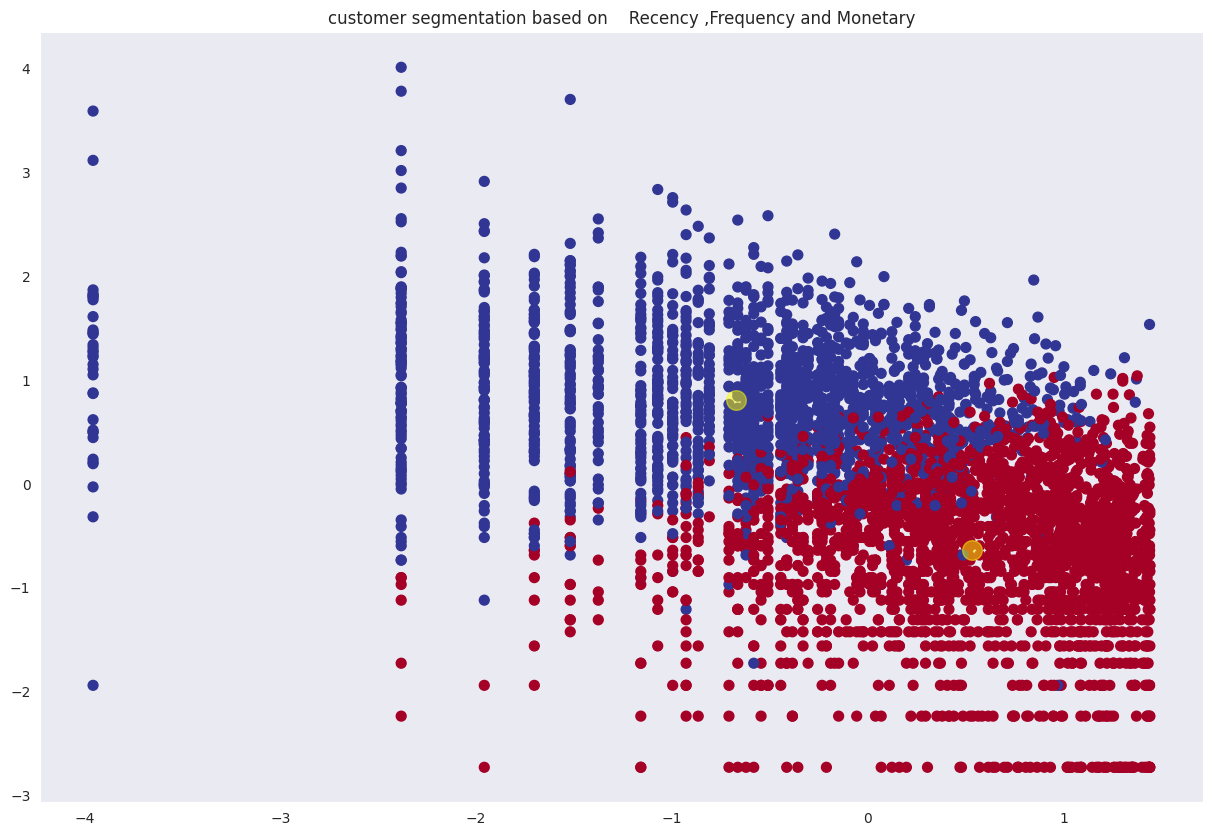

In [122]:
# Visualization of customer segmentation based On RFM features.
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on    Recency ,Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='RdYlBu')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5)

**Applying Elbow Method on Recency ,Frequency and Monetary**


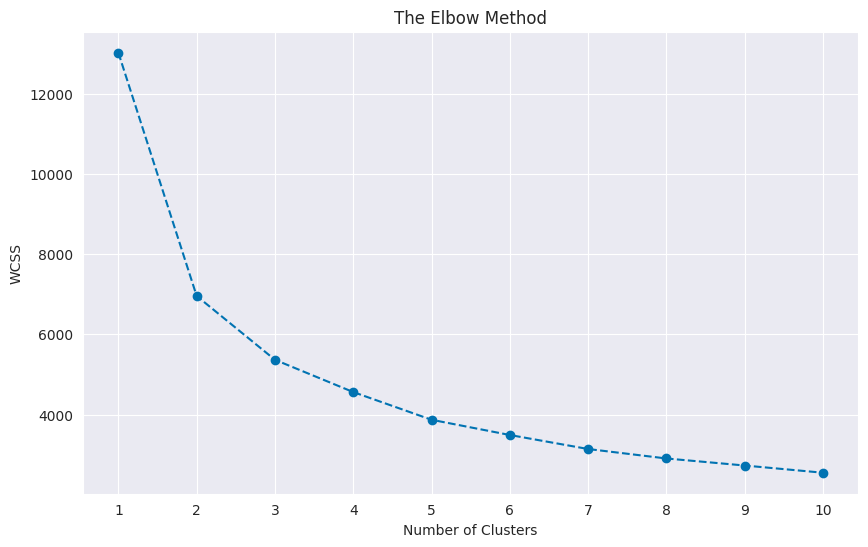

In [123]:
wcss = []  

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0) 
    kmeans.fit(X)  
    wcss.append(kmeans.inertia_) 

# Plot the WCSS values against the number of clusters
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()

In [124]:
# Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)

# Find the clusters for the observation given in the dataset
rfm_df['Cluster'] = KMean_clust.labels_
rfm_df.head(10)

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,Cluster
CustomerID,,,,,,,
12346.0,325,1,77183.60,5.784133,0.095310,11.253944,1
12347.0,2,182,4310.00,0.741937,5.204556,8.368716,0
12348.0,75,31,1797.24,4.318821,3.437208,7.494063,1
12349.0,18,73,1757.55,2.895912,4.291828,7.471733,0
12350.0,310,17,334.40,5.736895,2.839078,5.812637,1
12352.0,36,85,2506.04,3.586293,4.443827,7.826499,0
12353.0,204,4,89.00,5.318610,1.410987,4.489759,1
12354.0,232,58,1079.40,5.447168,4.062166,6.984253,1
12355.0,214,13,459.40,5.366443,2.572612,6.130139,1


### ML Model - 2

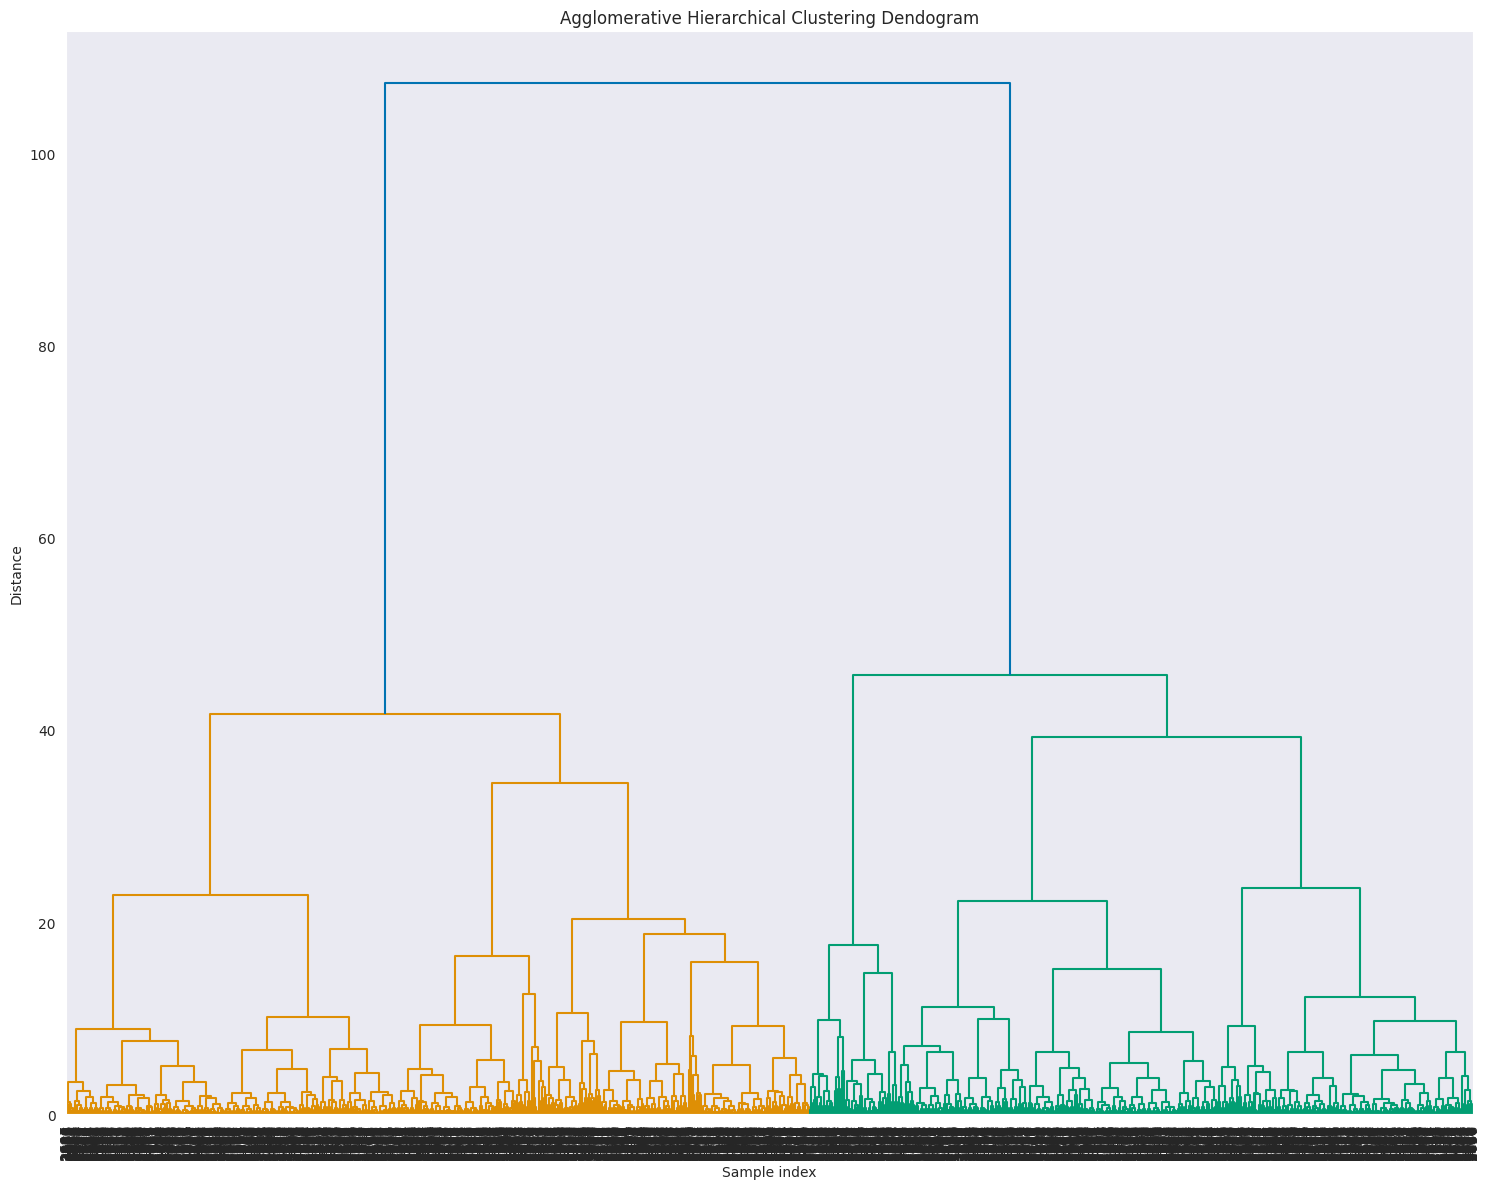

In [125]:
# Implenting ML Model
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

# ML Model
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

# Fit the data
model.fit(X)

# Visualisation dendrogram 
plt.figure(figsize=(15, 12))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
Z = linkage(X, 'ward')
dendrogram(Z, leaf_rotation=90.0, p=25, color_threshold=80, leaf_font_size=10, truncate_mode='level')
plt.tight_layout()

### ML Model - 3

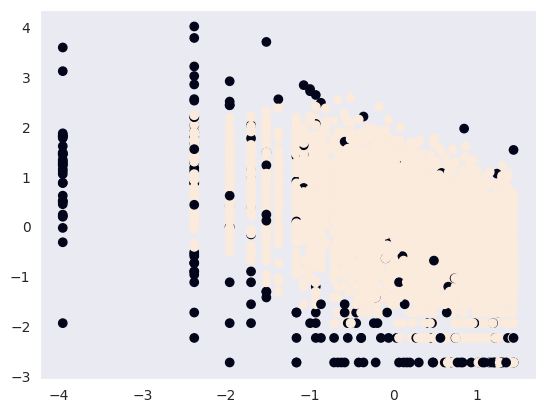

In [126]:
# ML Model Implementation
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.show()

### **Summary**

In [127]:
# Import necessary libraries
from prettytable import PrettyTable

# Initialize the table with specified column names
myTable = PrettyTable(['SL No.', "Model_Name", 'Data', "Optimal_Number_of_cluster"])

# Add rows to the table
myTable.add_row(['1', "K-Means with silhouette_score", "RFM", "2"])
myTable.add_row(['2', "K-Means with Elbow method", "RFM", "2"])
myTable.add_row(['3', "Hierarchical clustering", "RFM", "2"])
myTable.add_row(['4',"DBSCAN ", "RFM", "2"])

# Print the table
print(myTable)
     

+--------+-------------------------------+------+---------------------------+
| SL No. |           Model_Name          | Data | Optimal_Number_of_cluster |
+--------+-------------------------------+------+---------------------------+
|   1    | K-Means with silhouette_score | RFM  |             2             |
|   2    |   K-Means with Elbow method   | RFM  |             2             |
|   3    |    Hierarchical clustering    | RFM  |             2             |
|   4    |            DBSCAN             | RFM  |             2             |
+--------+-------------------------------+------+---------------------------+


# **Conclusion**


**EDA**

* Null values and duplicates were removed from the dataset before applying clustering.
* Top customer IDs were found to be 17841.0, 14911.0, 14096.0, 12748.0, and 14606.0.
* The top five countries based on the percentage of total orders were the United Kingdom (88.95%), Germany (2.33%), France (1.84%), Ireland (1.84%), and Spain (0.62%).
*  The top five products purchased based on frequency were White Hanging Heart T-Light Holder, Regency Cakestand 3 Tier, Jumbo Bag Red Retrospot, Party Bunting, and Assorted Colour Bird Ornament.
* The top stock codes based on count values were 85123A, 22423, 85099B, 47566, and 84879.

* New columns were created using InvoiceDate, such as Year, Month, Day, Hour, Month_Num, and Day_Num.
* The total amount of each order was calculated using the product of unit price and quantity.
* The months of November, October, December, September, and May generated the most business.
* The most popular purchasing days were Thursday, Wednesday, Tuesday, Monday, Saturday, and Friday.
* Most customers made purchases between 10:00 A.M. and 2:00 P.M.
* The top time duration for purchasing was found to be afternoon, followed by morning and evening.

---

**Algorithm**

* RFM (Recency, Frequency, and Monetary) dataframe helps in solving problems in a particular order, making it easy to recommend and display new products to selected customers.
* Different clustering algorithms were applied to the dataset, including: Clustering on Recency, Frequency & Monetary (RFM) with 2 clusters.

  1.  K-Means with Silhouette_score
  2.  K-Means with Elbow Method
  3.  Hierarchical Clustering
  4.  DBSCAN


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***